# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [3]:
data = np.loadtxt('C:\Local\Python\CS109A - Introduction\HW0\data\dataset_HW0.txt', delimiter = ',', skiprows = 1)

## Dimensions
print("Dimensions:" + str(data.shape))

## First three rows
print(data[0:3, ])

## Range
vec_names = ["birth weight", "femur length", "mother age"]

for i in range(0, 3):
    print("Range of " + vec_names[i] + ": [" + str(round(min(data[:, i]), 2)) + ", " + str(round(max(data[:, i]), 2)) + "]")


Dimensions:(400L, 3L)
[[  2.9694893    1.97915605  16.        ]
 [  4.03896294   3.5556812   16.        ]
 [  5.30264328   3.3856329   15.        ]]
Range of birth weight: [2.97, 9.02]
Range of femur length: [0.48, 6.65]
Range of mother age: [15.0, 49.0]


### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [4]:
## Overall mean
for i in range(0, 2):
    print("Overall mean of " + vec_names[i] + ": " + str(round(data[:, i].mean(), 2)))

## Split
data_young = data[data[:, 2] <= 17, ]
data_middle = data[(data[:, 2] >= 18) & (data[:, 2] <= 34), ]
data_old = data[(data[:, 2] >= 35) & (data[:, 2] <= 50), ]


## Mean young
for i in range(0, 2):
    print("0-17 year old mothers | Mean of " + vec_names[i] + ": " + str(round(data_young[:, i].mean(), 2)))

## Mean middle
for i in range(0, 2):
    print("18-34 year old mothers | Mean of " + vec_names[i] + ": " + str(round(data_middle[:, i].mean(), 2)))

## Mean old
for i in range(0, 2):
    print("35-50 year old mothers | Mean of " + vec_names[i] + ": " + str(round(data_old[:, i].mean(), 2)))


Overall mean of birth weight: 6.1
Overall mean of femur length: 3.83
0-17 year old mothers | Mean of birth weight: 5.17
0-17 year old mothers | Mean of femur length: 3.51
18-34 year old mothers | Mean of birth weight: 6.71
18-34 year old mothers | Mean of femur length: 4.0
35-50 year old mothers | Mean of birth weight: 5.84
35-50 year old mothers | Mean of femur length: 3.79


### Conclusion
Mother with the age between 18-35 have the highest birth weight and longest femur length, this is followed by 
35-50 year old and in the lowest category are mothers between 0-17. <br>

Furthermore, mothers between 18-35 are above the overall mean birth weigh & femure length while the other two 
categorys are below. <br>

There appears to be more variation in the birth weight than in the femure length. <br>

### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?

C:\Local\Software\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


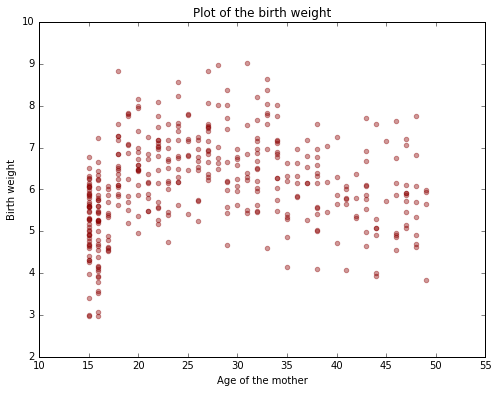

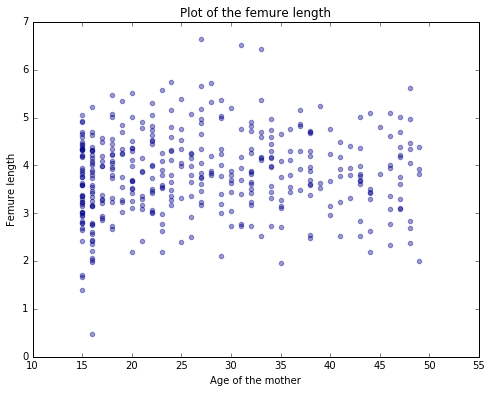

In [5]:
## Plot birth weight
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax = fig.add_subplot(1, 1, 1) # one row, one column, first plot
ax.scatter(data[:, 2], data[:, 0], color="darkred", alpha = 0.4) # Plot the data
ax.set_title("Plot of the birth weight") # Add a title.
ax.set_xlabel("Age of the mother") # Add some axis labels.
ax.set_ylabel("Birth weight")
fig.show() # Produce an image.

# The picture confirms the already seen picture. There appears to be a increase in the birth weight from the age of 17. There appear to be two shifts, 
# one at 17 and one at 35

## Plot femure length
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax = fig.add_subplot(1, 1, 1) # one row, one column, first plot
ax.scatter(data[:, 2], data[:, 1], color="darkblue", alpha = 0.4) # Plot the data
ax.set_title("Plot of the femure length") # Add a title.
ax.set_xlabel("Age of the mother") # Add some axis labels.
ax.set_ylabel("Femure length")
fig.show() # Produce an image.


The picture of the femure length appears to be more stable. Except for the situation for mothers below 17 there seems to be no "siginificant" difference in the femure length.

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

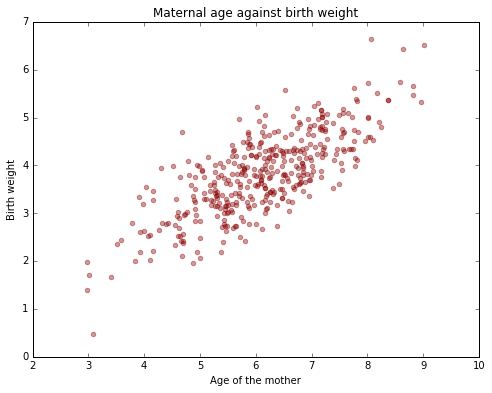

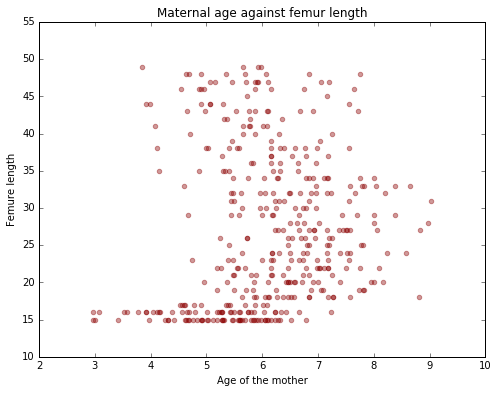

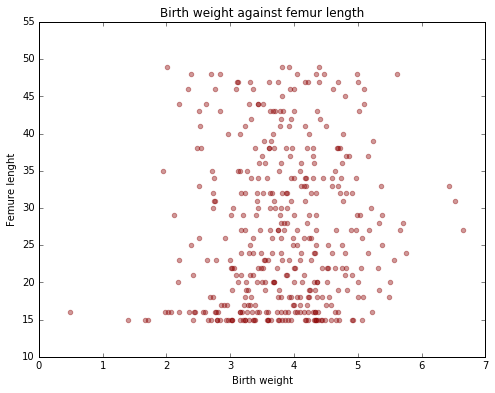

In [6]:
## Maternal age against birth weight
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax = fig.add_subplot(1, 1, 1) # one row, one column, first plot
ax.scatter(data[:, 0], data[:, 1], color="darkred", alpha = 0.4) # Plot the data
ax.set_title("Maternal age against birth weight") # Add a title.
ax.set_xlabel("Age of the mother") # Add some axis labels.
ax.set_ylabel("Birth weight")
fig.show() # Produce an image.

## Maternal age against femur length
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax = fig.add_subplot(1, 1, 1) # one row, one column, first plot
ax.scatter(data[:, 0], data[:, 2], color="darkred", alpha = 0.4) # Plot the data
ax.set_title("Maternal age against femur length") # Add a title.
ax.set_xlabel("Age of the mother") # Add some axis labels.
ax.set_ylabel("Femure length")
fig.show() # Produce an image.

## Birth weight against femur length
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax = fig.add_subplot(1, 1, 1) # one row, one column, first plot
ax.scatter(data[:, 1], data[:, 2], color="darkred", alpha = 0.4) # Plot the data
ax.set_title("Birth weight against femur length") # Add a title.
ax.set_xlabel("Birth weight") # Add some axis labels.
ax.set_ylabel("Femure lenght")
fig.show() # Produce an image.


### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).

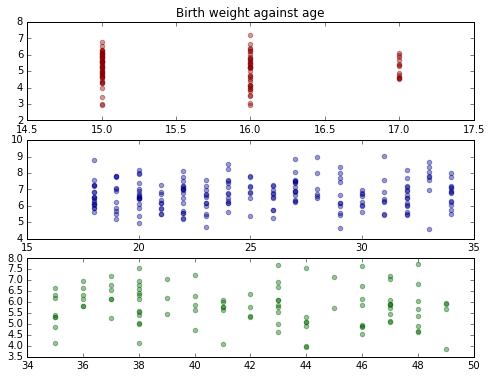

In [7]:
## 3D Chart
fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax1 = fig.add_subplot(3, 1, 1) # one row, one column, first plot
ax1.scatter(data_young[:, 2], data_young[:, 0], color="darkred", alpha = 0.4) # Plot the data
ax1.set_title("Birth weight against age") # Add a title.

ax2 = fig.add_subplot(3, 1, 2) # one row, one column, first plot
ax2.scatter(data_middle[:, 2], data_middle[:, 0], color="darkblue", alpha = 0.4) # Plot the data

ax3 = fig.add_subplot(3, 1, 3) # one row, one column, first plot
ax3.scatter(data_old[:, 2], data_old[:, 0], color="darkgreen", alpha = 0.4) # Plot the data
fig.show() # Produce an image.


## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [8]:
page = urllib.urlopen("http://www.gutenberg.org/files/5200/5200-h/5200-h.htm").read()
soup = BeautifulSoup(page, "lxml")

print(soup.prettify()[0:1000])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK ME


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

In [9]:
# 1. the content of the head tag
print(soup.head)

# 2. the text of the head tag
print(soup.head.getText())

# 3. each child of the head tag
print(soup.head.children)

# 4. the text of the title tag
print(soup.body.h1)

# 5. the text of the preamble (pre) tag
print(soup.body.pre.getText())

# 6. the text of the first paragraph (p) tag
print(soup.body.p.getText())


<head>
<title>Metamorphosis by Franz Kafka</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>

Metamorphosis by Franz Kafka


<h1>
  Metamorphosis<br/>
  Franz Kafka</h1>


The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David 

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

rint the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [12]:
## First 5000 Characters
print(soup.body.getText()[0:5000])

## Last 5000 Characters
print(soup.body.getText()[-5000:])






The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on


### Part (d): Extracting Text (Continued)

sing the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [16]:
onlytext = soup.body.find_all('p')
print(onlytext[1:1000])


[<p>"What's happened to me?" he thought.  It wasn't a dream.  His room,\r\na proper human room although a little too small, lay peacefully\r\nbetween its four familiar walls.  A collection of textile samples\r\nlay spread out on the table - Samsa was a travelling salesman - and\r\nabove it there hung a picture that he had recently cut out of an\r\nillustrated magazine and housed in a nice, gilded frame.  It showed\r\na lady fitted out with a fur hat and fur boa who sat upright,\r\nraising a heavy fur muff that covered the whole of her lower arm\r\ntowards the viewer.</p>, <p>Gregor then turned to look out the window at the dull weather.\r\nDrops of rain could be heard hitting the pane, which made him feel\r\nquite sad.  "How about if I sleep a little bit longer and forget all\r\nthis nonsense", he thought, but that was something he was unable to\r\ndo because he was used to sleeping on his right, and in his present\r\nstate couldn't get into that position.  However hard he threw\r\nhim

### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

Mean length of words is: 4.48
Mean length of sentence is: 146.04


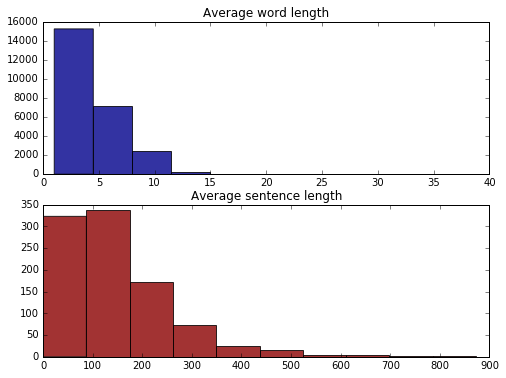

In [17]:
onlytext = soup.body.getText()
words = onlytext.split()
sentence = onlytext.split(".")

word_array = np.empty(0)
for i in range(0, len(words)):
    result = len(words[i])
    word_array = np.append(word_array, [result], axis = 0)

print("Mean length of words is: " + str(round(word_array.mean(), 2)))

sentence_array = np.empty(0)
for i in range(0, len(sentence)):
    result = len(sentence[i])
    sentence_array = np.append(sentence_array, [result], axis = 0)

print("Mean length of sentence is: " + str(round(sentence_array.mean(), 2)))


fig = plt.figure(figsize=(8, 6)) # Create a Figure object
ax1 = fig.add_subplot(2, 1, 1) # one row, one column, first plot
ax1.hist(word_array, color="darkblue", alpha = 0.8) # Plot the data
ax1.set_title("Average word length") # Add a title.
ax2 = fig.add_subplot(2, 1, 2) # one row, one column, first plot
ax2.hist(sentence_array, color="darkred", alpha = 0.8) # Plot the data
ax2.set_title("Average sentence length") # Add a title.
fig.show() # Produce an image.



## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

In [19]:
arrival_array = np.empty(0)
for i in range(0, 100):
    result = round(random.uniform(1, 20), 0)
    arrival_array = np.append(arrival_array, [result], axis = 0)
    
arrival_array = sorted(arrival_array)

service_array = np.empty(0)
for i in range(0, 100):
    result = round(random.uniform(5, 15), 0)
    service_array = np.append(service_array, [result], axis = 0)


### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

In [20]:
wait_array = np.zeros(100)
wait_array[0] = service_array[0]
for i in range(1, 100):
    wait_array[i] = (wait_array[i - 1] + service_array[i]) - arrival_array[i] + arrival_array[i - 1]


row_index = range(0, 100)
help_array = np.zeros(100)
for i in range(1, 100):
    help_array[i] = row_index[i] + row_index[i - 1]


print("Average waiting time: " + str(round(wait_array.mean(), 2)))



Average waiting time: 471.71


### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

In [ ]:
# Alas, not enough time 

## Problem 4 (Challenge Problem): More Web Scrapping

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).

In [ ]:
# Alas, not enough time 